#Qiskit introuduction
- Install Qiskit library  
- Defining quantum circuits  
- Apply quantum gates  
- Controlled gates  
- Measurement  
- Quantum Circuit details  
- Parametric gates  
- Quantum circuit manipulation  
- QASM  
- Arbitrary gates  
- Variational quantum gates  


##Install Qiskit library

In [ ]:
#installation of qiskit and the visualization tools
!pip install qiskit
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=542d344cd260adbe043c339456651844c7890da163ddba75be7075e8248d6a2c
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
import qiskit
print(qiskit.__version__)

2.1.1


##Defining the Quantum Circuits

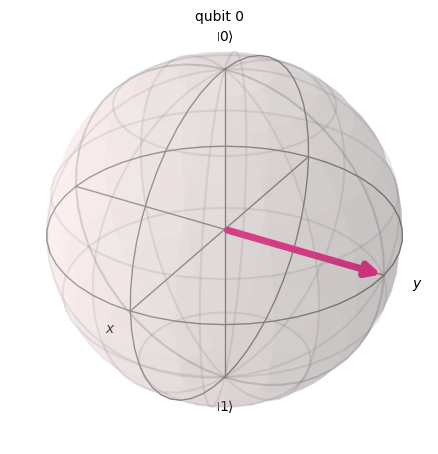

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import math
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
# qc.p(math.pi/2,0)
state=Statevector.from_instruction(qc)
state.draw("bloch")


In [ ]:
state.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.3 MB/s eta 0:00:00


Statevector([ 0.70710678+0.j        , -0.        +0.70710678j],
            dims=(2,))

Latex form:


<IPython.core.display.Latex object>



Block sphere form:


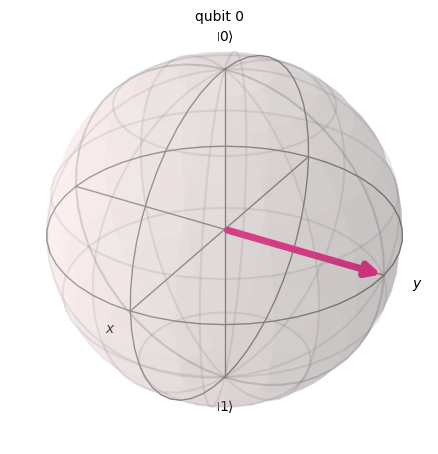

In [ ]:
from qiskit_aer import Aer

simulator = Aer.get_backend("statevector_simulator")
result = simulator.run(qc).result()
statevector = result.get_statevector()
print(statevector)

print("\nLatex form:")
display(statevector.draw("Latex"))

print("\n\nBlock sphere form:")
statevector.draw("bloch")

##Quantum Gates application



###1.Single Qubit Gates

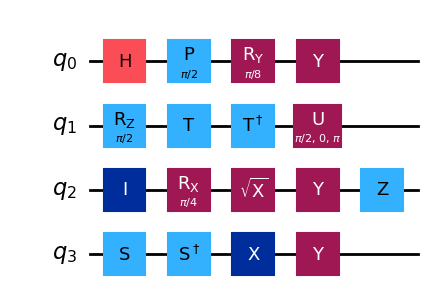

In [ ]:
qc = QuantumCircuit(4)
qc.h(0)
qc.id(2)
qc.p(math.pi/2,0)
qc.rx(math.pi/4,2)
qc.ry(math.pi/8,0)
qc.rz(math.pi/2,1)
qc.s(3)
qc.sdg(3)
qc.sx(2)
qc.t(1)
qc.tdg(1)
qc.u(math.pi/2,0,math.pi,1)
qc.x(3)
qc.y([0,2,3])
qc.z(2)

display(qc.draw("mpl"))

###2.Multi Qubit Gates (Controlled Quantum Gates)

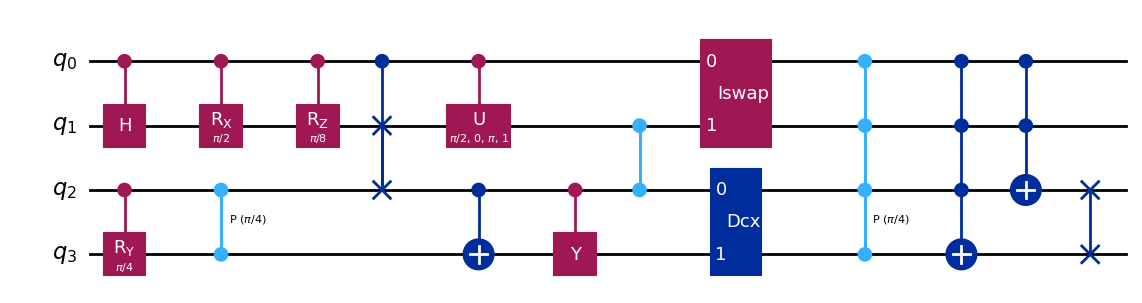

In [ ]:
#Define a Quantum Circuit with 4 qubits
qc = QuantumCircuit(4)
#Controlled hadamard gate
qc.ch(0,1)
#Controlled Ratation over x,y,z
qc.crx(math.pi/2,0,1)
qc.cry(math.pi/4,2,3)
qc.crz(math.pi/8,0,1)

#controlled phase gate
qc.cp(math.pi/4,2,3)

#controlled swap gate
qc.cswap(0,1,2)

#controlled universal gate
qc.cu(math.pi/2,0,math.pi,1,0,1)

#controlled pauli's gate(x,y,z)
qc.cx(2,3)
qc.cy(2,3)
qc.cz(1,2)

#Double-CNOT(DCX)
qc.dcx(2,3)

#iSWAP gate
qc.iswap(0,1)

#multi controlled quantum gates
qc.mcp(math.pi/4,[0,1,2],3)
qc.mcx([0,1,2],3)
qc.ccx(0,1,2)
qc.swap(2,3)


qc.draw("mpl")


###Greenberger-Horne-Zeilinger state (GHZ state)

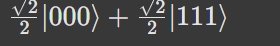


In [ ]:
#define a Quantum circuit with 3 qubits
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
s=Statevector.from_instruction(qc)
qc.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

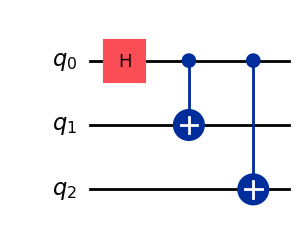

In [ ]:
qc.draw("mpl")

In [ ]:
s.draw("Latex")


<IPython.core.display.Latex object>

#Barrier Instroduction

In [ ]:

qc= QuantumCircuit(2)
qc.h(0)
qc.h(1)
# qc.h([0,1])
qc.barrier()
qc.x(0)
qc.s(1)
qc.barrier(1)
qc.x(0)
qc.s(1)

qc.draw()


┌───┐ ░ ┌───┐┌───┐     
q_0: ┤ H ├─░─┤ X ├┤ X ├─────
     ├───┤ ░ ├───┤└─░─┘┌───┐
q_1: ┤ H ├─░─┤ S ├──░──┤ S ├
     └───┘ ░ └───┘  ░  └───┘

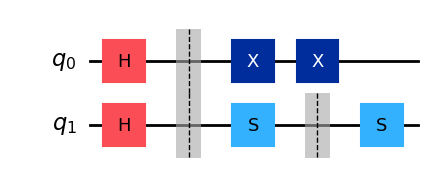

In [ ]:
qc.draw("mpl")

###Measurement

In [ ]:
#Create a Quantum Circuit with 3 qubits
qc = QuantumCircuit(3,3)
qc.h([0,1,2])
qc.measure([0,1,2],[0,1,2])
qc.draw()

┌───┐┌─┐      
q_0: ┤ H ├┤M├──────
     ├───┤└╥┘┌─┐   
q_1: ┤ H ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2

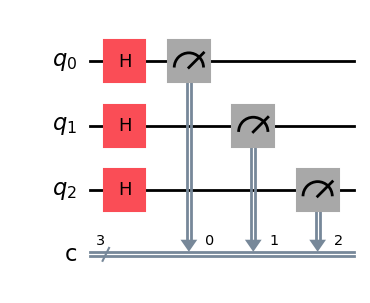

In [ ]:
qc.draw("mpl")

In [ ]:
qc= QuantumCircuit(3)
qc.h([0,1,2])
qc.measure_all() #automatically measures all qubits
qc.draw()

┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─░─┤M├──────
        ├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├─░──╫─┤M├───
        ├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─░──╫──╫─┤M├
        └───┘ ░  ║  ║ └╥┘
meas: 3/═════════╩══╩══╩═
                 0  1  2

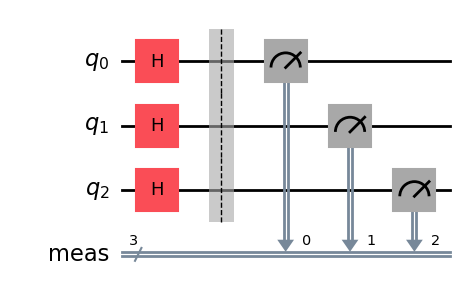

In [ ]:
qc.draw("mpl")

###Some Details of Quantum Circuits

####1.Depth of qc


Print the depth of the quantum circuit `qc`.
The depth is the length of the longest path from the beginning to the end of the circuit, in terms of gate layers.
It indicates the circuit's complexity in terms of the number of sequential operations.


In [ ]:
print(f"The Depth of the quantum circuit is : {qc.depth()}")

The Depth of the quantum circuit is : 2


####2.Total number of gates in qc
Print the total number of gates (operations) in the quantum circuit `qc`.
This includes all operations like gates and measurements that have been applied in the circuit.

In [ ]:
print(f"Total number of gates in the Circuit is : {qc.size()}")

Total number of gates in the Circuit is : 6


####3.Total number of wires in the qc
Print the total number of wires (both quantum and classical) in the quantum circuit `qc`.
This corresponds to the combined number of qubits and classical bits used in the circuit.

In [ ]:
print(f"Total number of wires in the Circuit is : {qc.width()}")

Total number of wires in the Circuit is : 6


####4.list of Classical bits in qc

Print the list of classical bits in the quantum circuit `qc`.
This will return a list of ClassicalRegister bits that the circuit uses for measurements.

In [ ]:
print(qc.clbits)

[<Clbit register=(3, "meas"), index=0>, <Clbit register=(3, "meas"), index=1>, <Clbit register=(3, "meas"), index=2>]


####5.All instructions in qc(gates, measurements etc...)
Print the list of operations (gates) and their corresponding qubits in the quantum circuit `qc`.
This will output all instructions in the circuit including gates, measurements, etc.

In [ ]:
print(f"All instructions in the Circuit are : {qc.count_ops()}")
print(qc.data)

All instructions in the Circuit are : OrderedDict([('h', 3), ('measure', 3), ('barrier', 1)])
[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=1>,), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=2>,), clbits=()), CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=()), CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(<Qubit register=(3, "q"), index=0>,), clbits=(<Clbit register=(3, "meas"), index=0>,)), CircuitInstruction(operation=Instructio

####6.Total number of Calssical bits
Print the total number of classical bits (classical wires) in the quantum circuit `qc`.
This value corresponds to the number of classical registers used for measurement or other classical control.

In [ ]:
print(f"Total numbber of Classical bits in the Circuit is : {qc.num_clbits}")


Total numbber of Classical bits in the Circuit is : 3


####7.List of Qubits
Print the list of quantum bits (qubits) in the quantum circuit `qc`.
This will return a list of Qubit objects that represent the quantum registers in the circuit.

In [ ]:
print(qc.qubits)

[<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>]


####8.Print the Global Phase

Print the global phase of the quantum circuit `qc`.
The global phase is a property of the circuit that affects the overall phase of the quantum state, but not the measurement results.

In [ ]:
print(f"Global Phase of the Circuit is : {qc.global_phase}")

Global Phase of the Circuit is : 0.0


####9.Quantum Wires

Print the total number of qubits (quantum wires) in the quantum circuit `qc`.
This value represents the total number of qubits in the circuit.

In [ ]:
print(f"Total number of quantum wires in the circuit is : {qc.num_qubits}")

Total number of quantum wires in the circuit is : 3


###Some other Gates(CXGate)

In [ ]:
#import the CXGate from the qiskit.circuit.library module
from qiskit.circuit.library import CXGate

qc = QuantumCircuit(2) #Quantum Circuit with 2 qubits

qc.h(1) #applying the hadamard gate on qubit 1

cx_gate = CXGate() #creating a CXGate object
qc.append(cx_gate,[1,0]) #application of CXGate

qc.draw() #drawing the circuit in text style

┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ H ├──■──
     └───┘

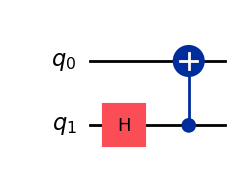

In [ ]:
qc.draw("mpl")  #drawing the circuit in mathplotlib style

## 🧠 Parametric Gates in Quantum Computing

Parameterized gates are quantum gates that depend on symbolic parameters, such as angles (e.g.,
𝜃
θ,
𝜆
λ). These parameters are not fixed numbers when the circuit is created — they are placeholders.

🔧 You bind values to them later, often during optimization or runtime.

---

### 🧩 Why Are Parametric Gates Important?

Parametric gates are foundational in:

- 🔬 Variational algorithms (e.g., VQE, QAOA)
- 🤖 Quantum machine learning circuits
- 🧮 Parameterized Quantum Circuits (PQCs)
- 🎯 Trainable quantum models (hybrid quantum-classical)

---

### 🧮 Common Parametric Gates (in Qiskit)

| Gate         | Description                       | Matrix Representation |
|--------------|-----------------------------------|------------------------|
| RX(θ)        | Rotation about X-axis             | $\left[\begin{array}{cc}\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\ -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)\end{array}\right]$ |
| RY(θ)        | Rotation about Y-axis             | $\left[\begin{array}{cc}\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)\end{array}\right]$ |
| RZ(θ)        | Rotation about Z-axis             | $\left[\begin{array}{cc}e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}}\end{array}\right]$ |
| P(λ)         | Phase shift gate                  | $\left[\begin{array}{cc}1 & 0 \\ 0 & e^{i\lambda}\end{array}\right]$ |
| U2(φ, λ)     | Rotation with π/2 angle           | $\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & -e^{i\lambda} \\ e^{i\phi} & e^{i(\phi+\lambda)}\end{array}\right]$ |
| U3(θ, φ, λ)  | General single-qubit rotation     | $\left[\begin{array}{cc}\cos\left(\frac{\theta}{2}\right) & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\ e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)\end{array}\right]$ |
| CRZ(θ)       | Controlled-RZ rotation            | Applies RZ(θ) when control is 1 |
| CP(λ)        | Controlled phase gate             | Applies phase shift when control is 1 |

---

### 🧠 How Are They Used?

- These gates allow symbolic definition first (e.g., `θ`) and numerical binding later.
- Perfect for variational circuits where gate angles are tuned by classical optimizers.

---

### 🧪 Terminology Summary

| Term               | Meaning                            |
|--------------------|-------------------------------------|
| Parametric Gate    | Gate with a tunable angle           |
| Symbolic Parameter | Placeholder (e.g., `θ`)             |
| Binding            | Assigning a value to a parameter    |


In [ ]:
#import the qiskit circuit class and parameter class
from qiskit.circuit import QuantumCircuit, Parameter

# Create three parameter objects to represent variable rotation angles
theta1=Parameter("θ1")
theta2=Parameter("θ2")
theta3=Parameter("θ3")


#create a quantum circuit with 3 qubits in it
qc = QuantumCircuit(3)

# Apply Hadamard gates to all three qubits (qubits 0, 1, and 2)
qc.h([0,1,2])

# Apply a parameterized phase gate to qubit 0 with angle θ1
qc.p(theta1,0)

# Apply a parameterized rotation about the X-axis to qubit 1 with angle θ2
qc.rx(theta2,1)

#Apply a parameterized phase gate to qubit 2 with angle θ3
qc.p(theta3,2)

# Draw the quantum circuit using text for visualization
qc.draw()

┌───┐┌───────┐ 
q_0: ┤ H ├┤ P(θ1) ├─
     ├───┤├───────┴┐
q_1: ┤ H ├┤ Rx(θ2) ├
     ├───┤├───────┬┘
q_2: ┤ H ├┤ P(θ3) ├─
     └───┘└───────┘

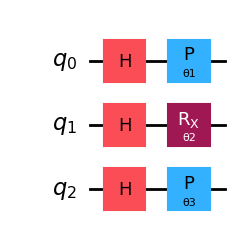

In [ ]:
# Draw the quantum circuit using Matplotlib for visualization
qc.draw("mpl")

In [ ]:
# Bind the parameters to specific values using assign_parameters
# θ1 is set to π/8
# θ2 is set to π/4
# θ3 is set to π/2
b_qc= qc.assign_parameters({theta1:math.pi/8,theta2:math.pi/4,theta3:math.pi/2})

b_qc.draw()

┌───┐ ┌────────┐
q_0: ┤ H ├─┤ P(π/8) ├
     ├───┤┌┴────────┤
q_1: ┤ H ├┤ Rx(π/4) ├
     ├───┤└┬────────┤
q_2: ┤ H ├─┤ P(π/2) ├
     └───┘ └────────┘

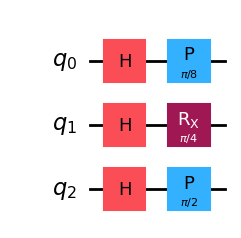

In [ ]:
b_qc.draw("mpl")

##Quantum Circuit manipulations

###Combining two quantum circuits

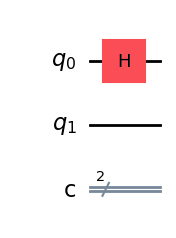

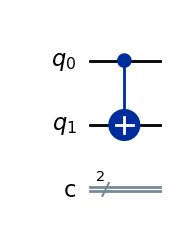

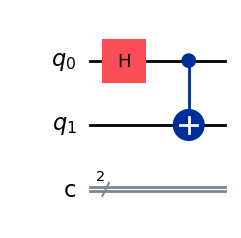

In [ ]:
#Create aquantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2,2)

#apply hadamard gate on first Qubit
qc.h(0)

#draw the first circuit
display(qc.draw("mpl"))

#Now intialize second circuit with 2 qubits and 2 classical bits
s_qc=QuantumCircuit(2,2)

#apply the cx
s_qc.cx(0,1)

#draw the circuit
display(s_qc.draw("mpl"))

#conbite the first and second qubit to the get the bell state
bell_state = qc.compose(s_qc)

#draw the combined circuit
bell_state.draw("mpl")


##Copying a Quantum Circuit

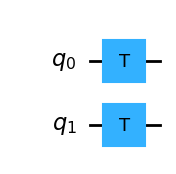

In [ ]:
#Create a Quantum circuit with 2 qubits
qc = QuantumCircuit(2)
#Apply T gate on it

qc.t([0,1])

#copy the qc into copied_qc
copied_qc = qc.copy()

#draw the copied circuit
copied_qc.draw("mpl")




##Decomposing the Quantum Circuit into its Fundamental Components

### 🧩 What is **Decomposing** a Quantum Circuit in Qiskit?

**Decomposition** in Qiskit means **breaking down composite or high-level gates** in a quantum circuit into their **simpler, more fundamental gates** (like `u1`, `u2`, `u3`, `cx`, etc.) that are **native to hardware**.

---

### 📌 Why is Decomposition Important?

- ✅ **Hardware Execution**: Real quantum devices can only run a limited set of *native gates*. Any circuit with more abstract or custom gates must be translated into these.
- ✅ **Visualization**: Helps you **understand what's happening under the hood** when using gates like `h`, `z`, or custom instructions.
- ✅ **Optimization**: You can better optimize your circuit if you see the low-level operations.

---

### 🧪 In Your Code:

```python
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.z(0)


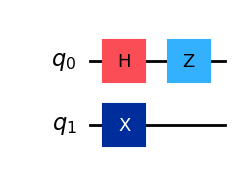

The Decomposed circuit : 


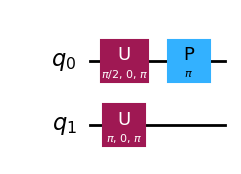

In [ ]:
#Start by creating a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

#apply hadamard gate on first qubit
qc.h(0)

#apply x gate on second qubit
qc.x(1)

#apply z gate on first qubit
qc.z(0)

#draw the circuit
display(qc.draw("mpl"))

#now decompose it into its fundamental components

decomposed_qc = qc.decompose()

#draw the circuit
print("The Decomposed circuit : ")
decomposed_qc.draw("mpl")

##Qubit intialization   $$
|\psi\rangle = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = |11\rangle
$$


┌──────────────────────┐
q_0: ┤0                     ├
     │  Initialize(0,0,0,1) │
q_1: ┤1                     ├
     └──────────────────────┘


The matplotlib visualization


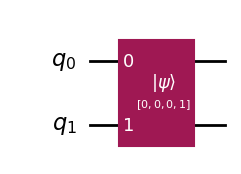

In [ ]:
#create a quantum with two qubits
qc = QuantumCircuit(2)

# Initialize the quantum circuit with the state |11>
# The state vector [0, 0, 0, 1] represents the state |11> in the computational basis
qc.initialize([0,0,0,1])

display(qc.draw())

print("\nThe matplotlib visualization")
qc.draw("mpl")

##Reset Gate

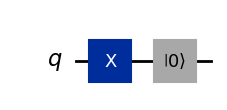

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.reset(0)

qc.draw("mpl")

##QASM STRING CODING

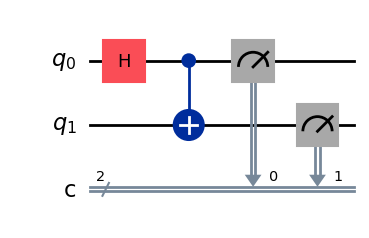

In [ ]:
# Define a QASM string that describes a quantum circuit
qasm_str = """
OPENQASM 2.0;            // Specify the version of OpenQASM being used
include "qelib1.inc";    // Include the standard quantum gate library
qreg q[2];               // Declare a quantum register with 2 qubits
creg c[2];               // Declare a classical register with 2 bits
h q[0];                  // Apply a Hadamard gate to the first qubit (index 0)
cx q[0],q[1];            // Apply a CNOT gate with the first qubit as control and the second as target
measure q[0] -> c[0];    // Measure the first qubit and store the result in the first classical bit
measure q[1] -> c[1];    // Measure the second qubit and store the result in the second classical bit
"""

# Create a quantum circuit from the QASM string
new_qc = QuantumCircuit.from_qasm_str(qasm_str)

display(new_qc.draw("mpl"))




##Qiskit to QASM

In [ ]:
#Create a Quantum Circuit using 2 qubits
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

#convert the quantum circuit to QASM string
qasm_string = qiskit.qasm3.dumps(qc)

print(qasm_string)

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
h q[0];
cx q[0], q[1];



##Building Arbitary Gate (Custom Gate)

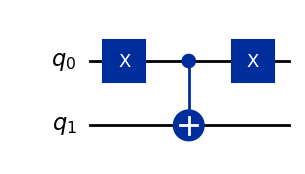

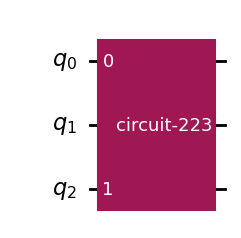

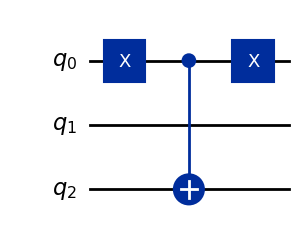

In [ ]:
anti_cx_qc = QuantumCircuit(2)

anti_cx_qc.x(0)
anti_cx_qc.cx(0,1)
anti_cx_qc.x(0)

display(anti_cx_qc.draw("mpl"))


#now custome gate into the gate
anti_cx_gate = anti_cx_qc.to_gate()


#Now define a new circuit and appl the newly created gate
new_qc = QuantumCircuit(3)
new_qc.append(anti_cx_gate,[0,2])
display(new_qc.draw("mpl"))


#decomposing the newly created gate into its original form
new_qc.decompose().draw("mpl")

##Building an instruction from the Quantum Circuit


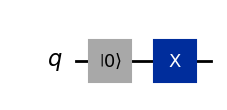

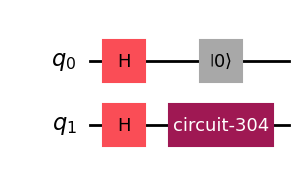

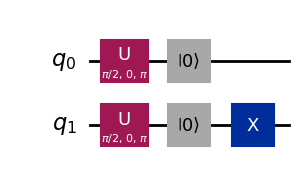

In [ ]:
reset_qc = QuantumCircuit(1)

reset_qc.reset(0)
reset_qc.x(0)

display(reset_qc.draw("mpl"))

#now build a quantum circuit of two bits
qc = QuantumCircuit(2)
qc.h([0,1])
qc.reset(0)
qc.append(reset_qc,[1])

display(qc.draw("mpl"))

#Now display its decomposition
qc.decompose().draw("mpl")

##Define Registers


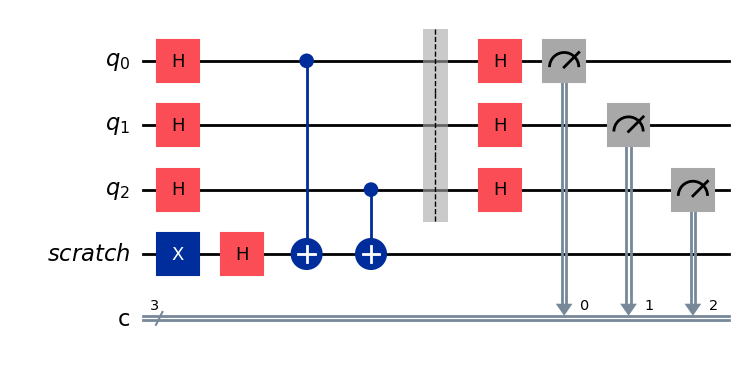

In [ ]:
# Import necessary classes from Qiskit
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
# Create a quantum register with 3 qubits and label it 'qr'
qr = QuantumRegister(3,'q')

# Create an additional quantum register with 1 qubit for intermediate operations and label it 'scratch'
scratch = QuantumRegister(1,'scratch')

# Create a classical register with 3 bits for measurement results and label it 'cr'
cr = ClassicalRegister(3,'c')

#Create a quantum circuit by using the Quantum Registers and classical register
qc = QuantumCircuit(qr,scratch,cr)

# Apply a Hadamard gate to each qubit in the main quantum register 'qr'
qc.h(qr)

# Apply an X (Pauli-X) gate to the qubit in the 'scratch' register
qc.x(scratch)

# Apply a Hadamard gate to the qubit in the 'scratch' register
qc.h(scratch)

# Apply a controlled-X (CNOT) gate with the first qubit of 'qr' as control and the 'scratch' qubit as target
qc.cx(qr[0],scratch)

# Apply a controlled-X (CNOT) gate with the third qubit of 'qr' as control and the 'scratch' qubit as target
qc.cx(qr[2],scratch)

# Add a barrier to prevent optimization across this point, preserving the sequence of operations
qc.barrier(qr)

# Apply a Hadamard gate again to each qubit in the main quantum register 'qr'
qc.h(qr)

# Measure the qubits in the main quantum register 'qr' and store the results in the classical register 'cr'
qc.measure(qr,cr)

# Draw the circuit diagram in matplotlib format
qc.draw("mpl")

##Multi controlled gates

In [ ]:
# Import the CCXGate (Toffoli gate) from Qiskit's circuit library
from qiskit.circuit.library import CCXGate

# Create an instance of the Toffoli gate (also known as CCXGate)
toffoli = CCXGate()


# Print the number of control qubits for the Toffoli gate
# The Toffoli gate has 2 control qubits by definition
print(toffoli.num_ctrl_qubits)


2


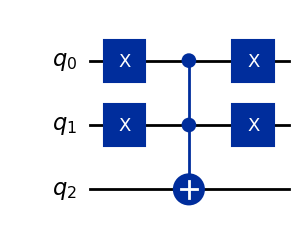

In [ ]:

toffoli = CCXGate()


# Convert to mutable
toffoli_mutable = toffoli.to_mutable()

# Modify the control state to be triggered by 2 (binary 10)
toffoli_mutable.ctrl_state = 0

toffoli_mutable.definition.draw("mpl")


toffoli_mutable.definition.draw("mpl") only shows how the gate is internally constructed, not how it behaves inside a circuit.

If you want to see it as part of a circuit, you must append it to a circuit and then draw that full circuit.



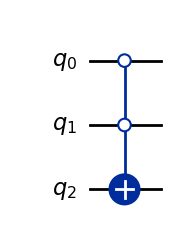

In [ ]:
qc = QuantumCircuit(3)

qc.append(toffoli_mutable,[0,1,2])

qc.draw("mpl")

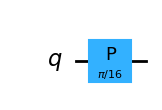

In [ ]:
import math #for mathmatical definitions

p16_qc = QuantumCircuit(1)
p16_qc.p(math.pi/16,0)

p16_gate = p16_qc.to_gate()

p16_gate.definition.draw("mpl")

### Create a controlled version of the p16_gate with 2 control qubits


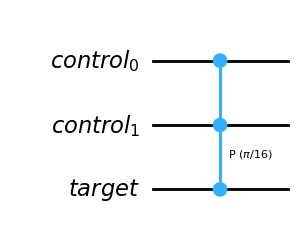

In [ ]:
ctrl_p16 = p16_gate.control(2)

ctrl_p16.definition.draw("mpl")

###Create a quantum circuit with 4 qubits.Apply Hadamard gates to qubits 0, 1, 2, and 3 to put them into superposition.Append the previously defined controlled p16_gate to the circuit.Apply it with control qubits 0 and 1, and target qubit 3.Decompose the appended controlled p16_gate back into its basic gates and draw the circuit

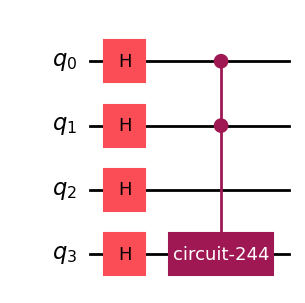

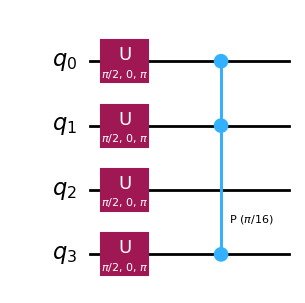

In [ ]:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.append(ctrl_p16,[0,1,3])


display(qc.draw("mpl"))

qc.decompose().draw("mpl")

##Variational Quantum Gates

In [ ]:
from qiskit.circuit import QuantumCircuit,ParameterVector

theta = ParameterVector('θ',3)

print(theta)

θ, ['θ[0]', 'θ[1]', 'θ[2]']


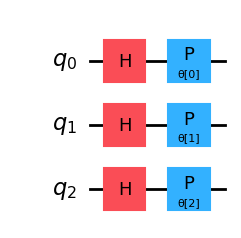

In [ ]:

#create a Quantum Circuit with 3 qubits
qc = QuantumCircuit(3)

#apply hadamrad on all the three qubits
qc.h([0,1,2])

#apply the pharamatrized phase gate to the qubit 0 with angle θ[0]
qc.p(theta[0], 0)

#apply the pharamatrized phase gate to the qubit 1 with angle θ[1]
qc.p(theta[1], 1)

#apply the pharamatrized phase gate to the qubit 2 with angle θ[2]
qc.p(theta[2],2)

qc.draw("mpl")

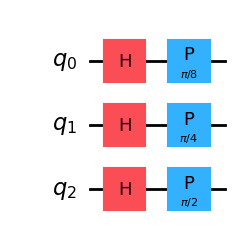

In [ ]:
#assign values to the parameters
b_qc = qc.assign_parameters(
    {theta:
     [math.pi/8,
      math.pi /4,
      math.pi/2]}
)

b_qc.draw("mpl")

#Author: Akash Yerra
